# Homework - Finding APIs

In this homework we're going to reverse-engineer [Airbnb](https://en.wikipedia.org/wiki/Airbnb)'s interactive tool to estimate the potential earnings by hosting.

You can read the [press release](https://news.airbnb.com/interactive-tool-estimates-potential-monthly-host-earnings-on-airbnb/) for the tool, and view the tool on [their website](https://www.airbnb.com/host/homes?room_type=ENTIRE_HOME).

## Getting started

As a reminder, you can follow along to the basic steps to do this from the [tutorial we went over during class](https://inspectelement.org/apis.html#tutorial).

### 0) Go to the website, and open the developer tools.

As a reminder, the website we'll be inspecting today is here:
https://www.airbnb.com/host/homes?room_type=ENTIRE_HOME

Visit that link, and open up the developer tools (see step 1 in the tutorial).

### 1) Use the site as intended

With the developer tools open, go to the "Network" tab.

Go back to the Airbnb website window, and search a new address. It can be any address. For example, you can check the area surrounding Columbia by entering, "Pulitzer Hall, Broadway, New York, NY, USA".

We're just doing this step to trigger the network request (API call) that requests the potential earnings for the new address.

### 2) Find the API call

After searching a new address, you should see more entries in the "Network" tab in the developer tools.

Try to find the exact API call that pulls the estimated earnings.

Hint: this is steps [3 and 4](https://inspectelement.org/apis.html#filter-requests-by-fetchxhr) in the tutorial.

When you feel like you found the API call, copy it as a curl, and convert that curl into a Python request using [curlconverter.com](https://curlconverter.com/).

Paste the request into the cell below, and run it.

In [19]:
import requests

headers = {
    'X-Airbnb-Supports-Airlock-V2': 'true',
    'X-CSRF-Token': 'null',
    'X-Airbnb-API-Key': 'd306zoyjsyarp7ifhu67rjxn52tv0t20',
    'X-Niobe-Short-Circuited': 'true',
    'dpr': '2',
    'device-memory': '8',
    'X-Airbnb-GraphQL-Platform-Client': 'minimalist-niobe',
    'X-Client-Version': '02a1143276205146d4662a7dd7103888a34ab46b',
    'X-CSRF-Without-Token': '1',
    'User-Agent': 'Mozilla/5.0 (iPhone; CPU iPhone OS 13_2_3 like Mac OS X) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/13.0.3 Mobile/15E148 Safari/604.1',
    'x-client-request-id': '0ovxgul0zbtwvg1i85ci80rgk9g9',
    'viewport-width': '375',
    'Content-Type': 'application/json',
    'Referer': 'https://www.airbnb.com/host/homes?room_type=ENTIRE_HOME',
    'ect': '4g',
    'X-Airbnb-GraphQL-Platform': 'web',
}

params = {
    'operationName': 'GetHostEstimateData',
    'locale': 'en',
    'currency': 'USD',
    'variables': '{"durationGranularity":["MONTHLY"],"source":"HOST_LANDING_PAGE","location":{"searchQuery":"1805 Allston Way, Berkeley, CA, USA"},"roomTypeCategory":"ENTIRE_HOME","bedroom":3,"fetchDebugInfo":false}',
    'extensions': '{"persistedQuery":{"version":1,"sha256Hash":"0ce03f62bd7e5cdaa639675604ea67ff782d277728c7c73b150b73c286ff9929"}}',
}

response = requests.get('https://www.airbnb.com/api/v3/GetHostEstimateData', params=params, headers=headers)

In [20]:
# use this function to show the raw JSON response
response.json()

{'data': {'presentation': {'__typename': 'RootPresentationContainer',
   'hostEstimate': {'__typename': 'HostEstimatePresentationContainer',
    'hostEstimateScreen': {'__typename': 'HostEstimateScreen',
     'header': {'__typename': 'HostEstimateHeader',
      'sections': [{'__typename': 'HostEstimateHeaderSection',
        'label': {'__typename': 'I18nText',
         'localizedString': 'Hosts in your area earn an average of*'},
        'suffix': {'__typename': 'I18nText', 'localizedString': '/ month'},
        'value': '$5,439'},
       {'__typename': 'HostEstimateHeaderSection',
        'label': {'__typename': 'I18nText', 'localizedString': 'They earn'},
        'suffix': {'__typename': 'I18nText', 'localizedString': '/ night'},
        'value': '$259'},
       {'__typename': 'HostEstimateHeaderSection',
        'label': {'__typename': 'I18nText',
         'localizedString': "They're booked"},
        'suffix': {'__typename': 'I18nText',
         'localizedString': 'nights / month'}

store the JSON response (dictionary) in a `records` variable to parse.

In [21]:
records = response.json()

here's a trick to see the keys in the dictionary.

In [22]:
records.keys()

dict_keys(['data', 'extensions'])

If the dictionary is nested, you can go to the next key, and then list the keys, again.

In [23]:
records['data']['presentation'].keys()

dict_keys(['__typename', 'hostEstimate'])

### 3) Parse the response
In the cell below, traverse the JSON response and get the estimated revenue per night. Store this in a variable named `estimate`.

In [24]:
estimate = records['data']['presentation']["hostEstimate"]["hostEstimateScreen"] \
            ["header"]["sliderSection"]["earningsEstimateListNative"][0]
estimate

'$259'

### 4) Recycle the API call

Next, we're going to make the API call reusable. In the cells below fill in what the URL is for the API call

In [25]:
# what is the URL of the API we found?
url = 'https://www.airbnb.com/api/v3/GetHostEstimateData'

# copy the necessary headers here
headers = {
    'X-Airbnb-API-Key': 'd306zoyjsyarp7ifhu67rjxn52tv0t20',
    'Content-Type': 'application/json',
    'Referer': 'https://www.airbnb.com/host/homes?room_type=ENTIRE_HOME'
}

# copy the necessary parameters here, but replace the hard-coded address with the variable
address = '1805 Allston Way, Berkeley, CA, USA'
params = {
    'operationName': 'GetHostEstimateData',
    'locale': 'en',
    'currency': 'USD',
    'variables': '{"durationGranularity":["MONTHLY"],"source":"HOST_LANDING_PAGE","location":{"searchQuery":"' + address + '"},"roomTypeCategory":"ENTIRE_HOME","bedroom":3,"fetchDebugInfo":false}',
    'extensions': '{"persistedQuery":{"version":1,"sha256Hash":"0ce03f62bd7e5cdaa639675604ea67ff782d277728c7c73b150b73c286ff9929"}}',
}

response = requests.get(url, params=params, headers=headers)
response.json()

{'data': {'presentation': {'__typename': 'RootPresentationContainer',
   'hostEstimate': {'__typename': 'HostEstimatePresentationContainer',
    'hostEstimateScreen': {'__typename': 'HostEstimateScreen',
     'header': {'__typename': 'HostEstimateHeader',
      'sections': [{'__typename': 'HostEstimateHeaderSection',
        'label': {'__typename': 'I18nText',
         'localizedString': 'Hosts in your area earn an average of*'},
        'suffix': {'__typename': 'I18nText', 'localizedString': '/ month'},
        'value': '$5,439'},
       {'__typename': 'HostEstimateHeaderSection',
        'label': {'__typename': 'I18nText', 'localizedString': 'They earn'},
        'suffix': {'__typename': 'I18nText', 'localizedString': '/ night'},
        'value': '$259'},
       {'__typename': 'HostEstimateHeaderSection',
        'label': {'__typename': 'I18nText',
         'localizedString': "They're booked"},
        'suffix': {'__typename': 'I18nText',
         'localizedString': 'nights / month'}

### 5) Make more API calls
Run the API call for at least two other `address`es

In [26]:
import time

In [27]:
# here are some random addresses you can use:
addresses = [
    "Pulitzer Hall, Broadway, New York, NY, USA",
    '1932 Bryant Avenue, The Bronx, NY, USA',
    '810 39th Avenue Northeast, Naples, FL, USA',
    '86 North 6th Street, Brooklyn, NY, USA'
]

numBedrooms = [1, 2, 3]

In [28]:
responses = [] # we'll record the API responses here.
for address in addresses:
    for numBedroom in numBedrooms:
        params = {
            'operationName': 'GetHostEstimateData',
            'locale': 'en',
            'currency': 'USD',
            'variables': '{"durationGranularity":["MONTHLY"],"source":"HOST_LANDING_PAGE","location":{"searchQuery":"' + address + '"},"roomTypeCategory":"ENTIRE_HOME","bedroom":' + str(numBedroom) + ', "fetchDebugInfo":false}',
            'extensions': '{"persistedQuery":{"version":1,"sha256Hash":"0ce03f62bd7e5cdaa639675604ea67ff782d277728c7c73b150b73c286ff9929"}}',
        }
        response = requests.get(url, params=params, headers=headers)

        # check if the API call was successful by checking the status
        if response.status_code == 200:
            responses.append(response.json())
    
        # put some time between requests
        time.sleep(1) 

### 6) What are the daily estimated earnings?
Print the estimated earning per night for each address in `responses`.

In [29]:
responses

[{'data': {'presentation': {'__typename': 'RootPresentationContainer',
    'hostEstimate': {'__typename': 'HostEstimatePresentationContainer',
     'hostEstimateScreen': {'__typename': 'HostEstimateScreen',
      'header': {'__typename': 'HostEstimateHeader',
       'sections': [{'__typename': 'HostEstimateHeaderSection',
         'label': {'__typename': 'I18nText',
          'localizedString': 'Hosts in your area earn an average of*'},
         'suffix': {'__typename': 'I18nText', 'localizedString': '/ month'},
         'value': '$3,806'},
        {'__typename': 'HostEstimateHeaderSection',
         'label': {'__typename': 'I18nText', 'localizedString': 'They earn'},
         'suffix': {'__typename': 'I18nText', 'localizedString': '/ night'},
         'value': '$173'},
        {'__typename': 'HostEstimateHeaderSection',
         'label': {'__typename': 'I18nText',
          'localizedString': "They're booked"},
         'suffix': {'__typename': 'I18nText',
          'localizedString':

In [30]:
for records in responses:
    estimate = records['data']['presentation']["hostEstimate"]["hostEstimateScreen"] \
            ["header"]["sliderSection"]["earningsEstimateListNative"][0]
    location = records['data']['presentation']["hostEstimate"]["hostEstimateScreen"]["locationDetails"]["shortName"]
    print(f"{location}: {estimate} per night")

Pulitzer Hall: $173 per night
Pulitzer Hall: $285 per night
Pulitzer Hall: $411 per night
1932 Bryant Avenue: $114 per night
1932 Bryant Avenue: $126 per night
1932 Bryant Avenue: $196 per night
810 39th Avenue Northeast: $109 per night
810 39th Avenue Northeast: $160 per night
810 39th Avenue Northeast: $214 per night
86 North 6th Street: $206 per night
86 North 6th Street: $283 per night
86 North 6th Street: $421 per night


### Extra Credit
1. We just printed the estimates above, can you also record the query addresses and print those, too?
2. Check different rental configurations in the number of "bedrooms".
3. What other information is hidden in the API response, anything interesting?

### Super Extra
1. Get a random sample of addresses from usps.biglocalnews.org
    - Merge socioeconomic data from the American Community Survey
    - Format the addresses to match the input in the Airbnb site.
2. Check if there are patterns in which areas are given the lowest estimates.

In [31]:
import pandas as pd

In [35]:
# https://usps.biglocalnews.org/
addresses_df = pd.read_csv("./Berkeley-200-addresses.csv")

In [36]:
addresses_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   address_full  200 non-null    object 
 1   number        200 non-null    int64  
 2   street        200 non-null    object 
 3   city          200 non-null    object 
 4   state         200 non-null    object 
 5   zip           200 non-null    int64  
 6   longitude     200 non-null    float64
 7   latitude      200 non-null    float64
 8   statefp       200 non-null    int64  
 9   countyfp      200 non-null    int64  
 10  tractce       200 non-null    int64  
 11  blkgrpce      200 non-null    int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 18.9+ KB


In [37]:
acs_metadata_df = pd.read_csv("./acs_data_2/ACSDP5Y2021.DP03-Column-Metadata.csv")

In [38]:
acs_metadata_df[acs_metadata_df["Label"].str.contains("Median")]

,Column Name,Label
246,DP03_0062E,Estimate!!INCOME AND BENEFITS (IN 2021 INFLATI...
247,DP03_0062M,Margin of Error!!INCOME AND BENEFITS (IN 2021 ...
248,DP03_0062MA,Annotation of Margin of Error!!INCOME AND BENE...
249,DP03_0062EA,Annotation of Estimate!!INCOME AND BENEFITS (I...
342,DP03_0086E,Estimate!!INCOME AND BENEFITS (IN 2021 INFLATI...
343,DP03_0086M,Margin of Error!!INCOME AND BENEFITS (IN 2021 ...
344,DP03_0086MA,Annotation of Margin of Error!!INCOME AND BENE...
345,DP03_0086EA,Annotation of Estimate!!INCOME AND BENEFITS (I...
358,DP03_0090E,Estimate!!INCOME AND BENEFITS (IN 2021 INFLATI...
359,DP03_0090M,Margin of Error!!INCOME AND BENEFITS (IN 2021 ...


In [39]:
acs_df = pd.read_csv("./acs_data_2/ACSDP5Y2021.DP03-Data.csv", skiprows=1)
acs_df

,Geography,Geographic Area Name,Estimate!!EMPLOYMENT STATUS!!Population 16 years and over,Margin of Error!!EMPLOYMENT STATUS!!Population 16 years and over,Annotation of Margin of Error!!EMPLOYMENT STATUS!!Population 16 years and over,Annotation of Estimate!!EMPLOYMENT STATUS!!Population 16 years and over,Estimate!!EMPLOYMENT STATUS!!Population 16 years and over!!In labor force,Annotation of Estimate!!EMPLOYMENT STATUS!!Population 16 years and over!!In labor force,Margin of Error!!EMPLOYMENT STATUS!!Population 16 years and over!!In labor force,Annotation of Margin of Error!!EMPLOYMENT STATUS!!Population 16 years and over!!In labor force,...,Annotation of Percent Margin of Error!!PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL!!All people!!18 years and over!!65 years and over,Percent!!PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL!!All people!!People in families,Percent Margin of Error!!PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL!!All people!!People in families,Annotation of Percent Margin of Error!!PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL!!All people!!People in families,Annotation of Percent!!PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL!!All people!!People in families,Percent!!PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL!!All people!!Unrelated individuals 15 years and over,Percent Margin of Error!!PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL!!All people!!Unrelated individuals 15 years and over,Annotation of Percent Margin of Error!!PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL!!All people!!Unrelated individuals 15 years and over,Annotation of Percent!!PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL!!All people!!Unrelated individuals 15 years and over,Unnamed: 1098
0,860Z200US89010,ZCTA5 89010,369,103,NaN,NaN,182,NaN,62,NaN,...,NaN,0.0,10.3,NaN,NaN,6.9,7.0,NaN,NaN,NaN
1,860Z200US89019,ZCTA5 89019,1989,505,NaN,NaN,906,NaN,293,NaN,...,NaN,11.4,13.5,NaN,NaN,10.7,13.3,NaN,NaN,NaN
2,860Z200US89060,ZCTA5 89060,9993,850,NaN,NaN,4244,NaN,578,NaN,...,NaN,14.0,6.8,NaN,NaN,26.3,5.5,NaN,NaN,NaN
3,860Z200US89061,ZCTA5 89061,6027,667,NaN,NaN,2289,NaN,476,NaN,...,NaN,3.5,2.8,NaN,NaN,22.0,12.6,NaN,NaN,NaN
4,860Z200US89439,ZCTA5 89439,1317,201,NaN,NaN,727,NaN,189,NaN,...,NaN,0.0,3.4,NaN,NaN,23.2,16.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1803,860Z200US96148,ZCTA5 96148,616,233,NaN,NaN,387,NaN,179,NaN,...,NaN,0.0,7.3,NaN,NaN,0.0,19.6,NaN,NaN,NaN
1804,860Z200US96150,ZCTA5 96150,25473,779,NaN,NaN,17694,NaN,752,NaN,...,NaN,6.4,2.3,NaN,NaN,20.1,3.0,NaN,NaN,NaN
1805,860Z200US96155,ZCTA5 96155,0,13,NaN,NaN,0,NaN,13,NaN,...,**,-,**,**,-,-,**,**,-,NaN
1806,860Z200US96161,ZCTA5 96161,15447,405,NaN,NaN,10691,NaN,503,NaN,...,NaN,6.2,3.1,NaN,NaN,20.5,6.0,NaN,NaN,NaN


In [40]:
acs_df[acs_df["Geographic Area Name"].str.contains("94703")][["Estimate!!INCOME AND BENEFITS (IN 2021 INFLATION-ADJUSTED DOLLARS)!!Total households!!Median household income (dollars)", 
                                              "Percent!!INCOME AND BENEFITS (IN 2021 INFLATION-ADJUSTED DOLLARS)!!Total households!!Median household income (dollars)"]]

,Estimate!!INCOME AND BENEFITS (IN 2021 INFLATION-ADJUSTED DOLLARS)!!Total households!!Median household income (dollars),Percent!!INCOME AND BENEFITS (IN 2021 INFLATION-ADJUSTED DOLLARS)!!Total households!!Median household income (dollars)
1137,95125,(X)


In [41]:
acs_df["acs_zip"] = acs_df["Geographic Area Name"].str.lstrip("ZCTA5 ").apply(lambda x: int(x))

In [42]:
addresses_df["zip"].sort_values()

199    94702
169    94702
24     94702
112    94702
113    94702
       ...  
130    94710
128    94710
47     94710
89     94710
35     94710
Name: zip, Length: 200, dtype: int64

In [43]:
merged_df = pd.merge(
    addresses_df,
    acs_df,
    how="left",
    left_on="zip",
    right_on="acs_zip",
    left_index=False,
    right_index=False,
    sort=True,
    suffixes=("_x", "_y"),
    copy=True,
    indicator=False,
    validate=None,
)[["address_full", "longitude", "latitude", "zip", 
   "Estimate!!INCOME AND BENEFITS (IN 2021 INFLATION-ADJUSTED DOLLARS)!!Total households!!Median household income (dollars)"]]

In [44]:
merged_df.rename(
    columns={
        "Estimate!!INCOME AND BENEFITS (IN 2021 INFLATION-ADJUSTED DOLLARS)!!Total households!!Median household income (dollars)": "median_household_income"
    }, inplace=True)

In [60]:
merged_df["median_household_income"] = merged_df["median_household_income"].apply(lambda x: int(x))

In [61]:
type(merged_df["median_household_income"][0])

numpy.int64

In [62]:
merged_df

,address_full,longitude,latitude,zip,median_household_income,nightly_rate_3bdrm
0,"2051 SAN PABLO AVE BERKELEY, CA 94702",-122.291530,37.868426,94702,86058,244
1,"1326 DERBY ST BERKELEY, CA 94702",-122.283433,37.858021,94702,86058,253
2,"1369 ADA ST BERKELEY, CA 94702",-122.286201,37.878792,94702,86058,283
3,"1304 KAINS AVE BERKELEY, CA 94702",-122.295049,37.880334,94702,86058,257
4,"3006 STANTON ST BERKELEY, CA 94702",-122.279822,37.852947,94702,86058,272
...,...,...,...,...,...,...
195,"1080 JONES ST BERKELEY, CA 94710",-122.295305,37.876057,94710,105729,238
196,"1834 FOURTH ST BERKELEY, CA 94710",-122.300593,37.869266,94710,105729,229
197,"1632 SEVENTH ST BERKELEY, CA 94710",-122.298671,37.873545,94710,105729,226
198,"914 DELAWARE ST BERKELEY, CA 94710",-122.296519,37.870714,94710,105729,227


In [68]:
def get_nightly_rate_usd(test_address, numBedroom=3):
    params = {
        'operationName': 'GetHostEstimateData',
        'locale': 'en',
        'currency': 'USD',
        'variables': '{"durationGranularity":["MONTHLY"],"source":"HOST_LANDING_PAGE","location":{"searchQuery":"' + test_address + '"},"roomTypeCategory":"ENTIRE_HOME","bedroom":' + str(numBedroom) + ', "fetchDebugInfo":false}',
        'extensions': '{"persistedQuery":{"version":1,"sha256Hash":"0ce03f62bd7e5cdaa639675604ea67ff782d277728c7c73b150b73c286ff9929"}}',
    }
    response = requests.get(url, params=params, headers=headers)
    records = response.json()

    # check if the API call was successful by checking the status
    if response.status_code != 200:
        return None
    else:
        # put some time between requests
        time.sleep(1) 

        estimate = records['data']['presentation']["hostEstimate"]["hostEstimateScreen"] \
                ["header"]["sliderSection"]["earningsEstimateListNative"][0]
        location = records['data']['presentation']["hostEstimate"]["hostEstimateScreen"]["locationDetails"]["shortName"]
        print(f"{location}: {estimate} per night")

        return int(estimate.lstrip("$"))

In [69]:
test_address = "1805 Allston Way, Berkeley, CA, USA"
get_nightly_rate_usd(test_address, 3)

1805 Allston Way: $259 per night


259

In [49]:
from tqdm.autonotebook import tqdm
tqdm.pandas()

/var/folders/bj/f8d2gyg97z9fk5h2t1f8h5_h0000gn/T/ipykernel_11824/1870754706.py:1: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [50]:
merged_df["nightly_rate_3bdrm"] = merged_df["address_full"].progress_apply(lambda x: get_nightly_rate_usd(x, 3))

  0%|          | 0/200 [00:00<?, ?it/s]

2051 SAN PABLO AVE BERKELEY: $244 per night
1326 DERBY ST BERKELEY: $253 per night
1369 ADA ST BERKELEY: $283 per night
1304 KAINS AVE BERKELEY: $257 per night
3006 STANTON ST BERKELEY: $272 per night
1615 STANNAGE AV BERKELEY: $245 per night
3015 SAN PABLO AV BERKELEY: $245 per night
1436 NEILSON ST BERKELEY: $241 per night
1242 BURNETT ST BERKELEY: $248 per night
1225 ASHBY AV BERKELEY: $246 per night
3004 DOHR ST BERKELEY: $261 per night
1243 ASHBY AVE BERKELEY: $249 per night
2412 VALLEY ST BERKELEY: $246 per night
1231 BANCROFT WAY BERKELEY: $237 per night
2151 N VALLEY ST BERKELEY: $253 per night
1399 DELAWARE ST BERKELEY: $281 per night
1437 BANCROFT WAY BERKELEY: $253 per night
1337 ASHBY AV BERKELEY: $258 per night
1320 ADDISON ST BERKELEY: $241 per night
1413 FAIRVIEW ST BERKELEY: $260 per night
2306 SACRAMENTO ST BERKELEY: $250 per night
1308 ADDISON ST BERKELEY: $244 per night
2762 DOHR ST BERKELEY: $261 per night
2901 ACTON ST BERKELEY: $254 per night
2752 MABEL ST BERKELE

In [70]:
import matplotlib

<Axes: xlabel='median_household_income', ylabel='nightly_rate_3bdrm'>

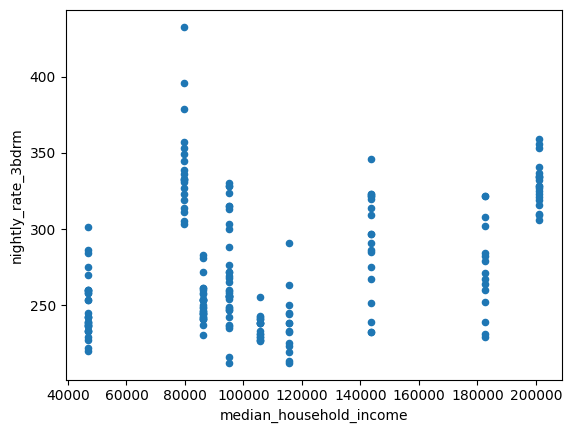

In [71]:
merged_df.plot.scatter(x="median_household_income", y="nightly_rate_3bdrm")

<Axes: xlabel='median_household_income', ylabel='nightly_rate_3bdrm'>

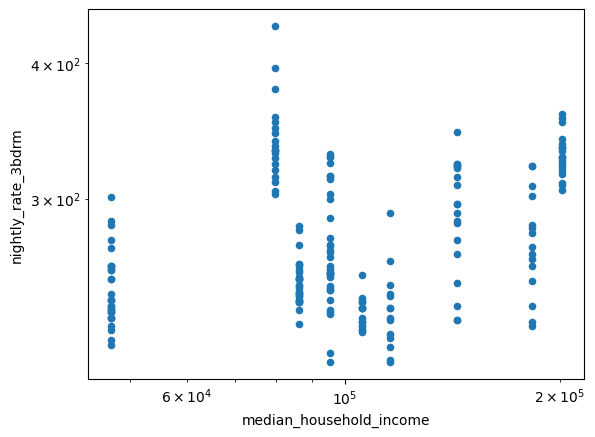

In [72]:
import matplotlib.pyplot as plt

merged_df.plot.scatter(x="median_household_income", y="nightly_rate_3bdrm", logy=True, logx=True)

In [73]:
merged_df.to_csv("./output/airbnb_acs.csv")